Imagine the following: you're walking up the empire state building to DataCamp HeadQuarters and you're playing a game with a friend. You throw a die one hundred times. If it's 1 or 2 you'll go one step down. If it's 3, 4, or 5, you'll go one step up. If you throw a 6, you'll throw the die again and will walk up the resulting number of steps. Of course, you can not go lower than step number 0. And also, you admit that you're a bit clumsy and have a chance of 0.1% of falling down the stairs when you make a move. Falling down means that you have to start again from step 0. With all of this in mind, you bet with your friend that you'll reach 60 steps high. What is the chance that you will win this bet? It's a complex assignment. One way to solve it would be to calculate the chance analytically using equations. Another possible approach, is to simulate this process thousands of times, and see in what fraction of the simulations that you will reach 60 steps. This is a form of -hacker statistics-. As you can probably guess, we're going to opt for the second approach. 








#### Random float
Randomness has many uses in science, art, statistics, cryptography, gaming, gambling, and other fields. You're going to use randomness to simulate a game.

All the functionality you need is contained in the random package, a sub-package of numpy. In this exercise, you'll be using two functions from this package:

- seed(): sets the random seed, so that your results are reproducible between simulations. As an argument, it takes an integer of your choosing. If you call the function, no output will be generated.
 
- rand(): if you don't specify any arguments, it generates a random float between zero and one.

In [1]:
# Import numpy as np
import numpy as np


# Set the seed
np.random.seed(123)


# Generate and print random float
print(np.random.rand())


0.6964691855978616


In [2]:
# Use randint() to simulate a dice
print(np.random.randint(1, 7))

# Use randint() again
print(np.random.randint(1, 7))


3
5


In the Empire State Building bet, your next move depends on the number of eyes you throw with the dice. We can perfectly code this with an if-elif-else construct!

In [3]:
# Initialize random_walk
random_walk = [0]


for x in range(100) :
    # Set step: last element in random_walk
    step = random_walk[-1]

    # Roll the dice
    dice = np.random.randint(1,7)

    # Determine next step
    if dice <= 2:
        step = step - 1
    elif dice <= 5:
        step = step + 1
    else:
        step = step + np.random.randint(1,7)

    # append next_step to random_walk
    random_walk.append(step)

# Print random_walk
print(random_walk)


[0, 1, 0, 1, 2, 3, 2, 1, 0, -1, -2, -3, -4, -5, -4, 1, 0, -1, 0, -1, 0, 1, 2, 3, 4, 3, 4, 3, 4, 5, 6, 7, 6, 10, 11, 10, 11, 10, 11, 12, 13, 14, 15, 16, 17, 20, 21, 22, 23, 28, 29, 33, 34, 33, 34, 35, 34, 35, 36, 38, 39, 40, 39, 38, 39, 40, 39, 38, 39, 40, 42, 41, 40, 41, 40, 41, 42, 43, 45, 44, 45, 46, 47, 48, 49, 48, 47, 48, 47, 48, 49, 48, 51, 52, 53, 54, 53, 54, 55, 59, 58]


Things are shaping up nicely! We already have code that calculates your location in the Empire State Building after 100 dice throws. However, there's something we haven't thought about - you can't go below 0!

A typical way to solve problems like this is by using max(). If you pass max() two arguments, the biggest one gets returned. For example, to make sure that a variable x never goes below 10 when you decrease it, you can use:



In [4]:
# Initialize random_walk
random_walk = [0]

for x in range(100) :
    step = random_walk[-1]
    dice = np.random.randint(1,7)

    if dice <= 2:
        # Replace below: use max to make sure step can't go below 0
        step = max(0, step - 1)
    elif dice <= 5:
        step = step + 1
    else:
        step = step + np.random.randint(1,7)

    random_walk.append(step)

print(random_walk)

[0, 0, 2, 1, 2, 4, 5, 6, 11, 10, 11, 12, 13, 14, 15, 14, 19, 20, 21, 22, 21, 20, 19, 18, 17, 18, 19, 20, 26, 25, 24, 23, 24, 25, 26, 25, 26, 27, 26, 31, 32, 31, 30, 29, 28, 29, 28, 27, 29, 30, 33, 34, 36, 37, 38, 39, 38, 37, 38, 39, 40, 41, 40, 41, 42, 43, 46, 47, 48, 47, 48, 47, 48, 49, 50, 54, 53, 52, 53, 54, 55, 54, 55, 54, 55, 57, 62, 61, 62, 63, 64, 65, 66, 67, 66, 67, 68, 69, 71, 73, 72]


Let's visualize this random walk using matplotlib


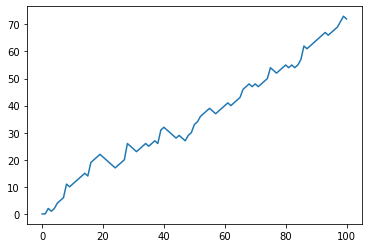

In [5]:
# Import matplotlib.pyplot as plt
import matplotlib.pyplot as plt


# Plot random_walk
plt.plot(random_walk)


# Show the plot
plt.show()

A single random walk is one thing, but that doesn't tell you if you have a good chance at winning the bet.

To get an idea about how big your chances are of reaching 60 steps, you can repeatedly simulate the random walk and collect the results.

In [6]:
# Initialize all_walks (don't change this line)
all_walks = []

# Simulate random walk 10 times
for i in range(10) :

    # Code from before
    random_walk = [0]
    for x in range(100) :
        step = random_walk[-1]
        dice = np.random.randint(1,7)

        if dice <= 2:
            step = max(0, step - 1)
        elif dice <= 5:
            step = step + 1
        else:
            step = step + np.random.randint(1,7)
        random_walk.append(step)

    # Append random_walk to all_walks
    all_walks.append(random_walk)

# Print all_walks
print(all_walks)

[[0, 1, 2, 5, 4, 5, 4, 5, 6, 7, 6, 7, 6, 7, 8, 10, 9, 8, 9, 10, 9, 11, 12, 13, 14, 15, 16, 17, 16, 17, 18, 23, 24, 23, 22, 21, 20, 21, 22, 23, 28, 29, 28, 29, 30, 31, 32, 33, 34, 33, 32, 33, 32, 38, 37, 38, 37, 38, 37, 38, 42, 46, 48, 50, 49, 50, 52, 51, 57, 58, 60, 61, 60, 61, 62, 63, 62, 63, 64, 65, 67, 66, 65, 66, 72, 77, 76, 75, 79, 80, 81, 82, 84, 83, 84, 83, 84, 83, 82, 88, 87], [0, 1, 2, 3, 4, 5, 6, 7, 8, 7, 8, 7, 6, 7, 6, 7, 6, 7, 8, 12, 13, 12, 18, 17, 16, 17, 16, 15, 16, 15, 19, 18, 19, 18, 19, 18, 19, 21, 20, 19, 18, 19, 18, 23, 24, 25, 24, 23, 24, 23, 24, 23, 28, 29, 28, 27, 26, 25, 26, 27, 31, 37, 38, 39, 40, 41, 40, 41, 43, 44, 45, 46, 45, 44, 45, 44, 45, 46, 47, 46, 47, 48, 49, 48, 47, 48, 49, 54, 55, 56, 61, 60, 61, 60, 61, 62, 63, 64, 63, 69, 68], [0, 1, 0, 0, 1, 5, 6, 7, 8, 9, 8, 7, 6, 5, 4, 5, 6, 7, 8, 9, 10, 9, 10, 11, 10, 11, 12, 15, 14, 15, 14, 15, 18, 19, 20, 21, 20, 19, 22, 23, 24, 25, 24, 23, 24, 27, 28, 33, 34, 33, 34, 33, 34, 33, 39, 38, 37, 38, 40, 39, 38, 3

all_walks is a list of lists: every sub-list represents a single random walk. If you convert this list of lists to a Numpy array, you can start making interesting plots! matplotlib.pyplot is already imported as plt.

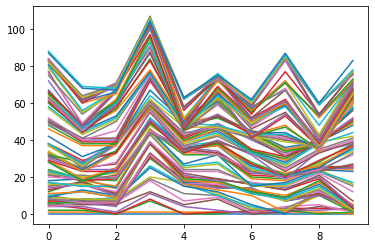

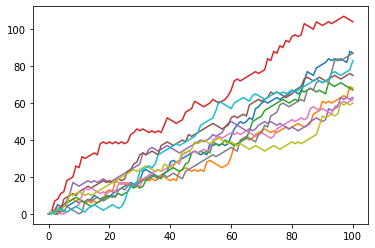

In [7]:
# Convert all_walks to Numpy array: np_aw
np_aw = np.array(all_walks)


# Plot np_aw and show
plt.plot(np_aw)
plt.show()


# Clear the figure
plt.clf()

# Transpose np_aw: np_aw_t
np_aw_t = np.transpose(np_aw)


# Plot np_aw_t and show
plt.plot(np_aw_t)
plt.show()

There's still something we forgot! You're a bit clumsy and you have a 0.1% chance of falling down. That calls for another random number generation. Basically, you can generate a random float between 0 and 1. If this value is less than or equal to 0.001, you should reset step to 0.

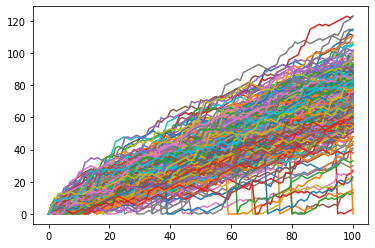

In [8]:
# Simulate random walk 250 times
all_walks = []
for i in range(250) :
    random_walk = [0]
    for x in range(100) :
        step = random_walk[-1]
        dice = np.random.randint(1,7)
        if dice <= 2:
            step = max(0, step - 1)
        elif dice <= 5:
            step = step + 1
        else:
            step = step + np.random.randint(1,7)

        # Implement clumsiness
        if np.random.rand() <= 0.001:
            step = 0

        random_walk.append(step)
    all_walks.append(random_walk)

# Create and plot np_aw_t
np_aw_t = np.transpose(np.array(all_walks))
plt.plot(np_aw_t)
plt.show()

All these fancy visualizations have put us on a sidetrack. We still have to solve the million-dollar problem: What are the odds that you'll reach 60 steps high on the Empire State Building?

Basically, you want to know about the end points of all the random walks you've simulated. These end points have a certain distribution that you can visualize with a histogram.

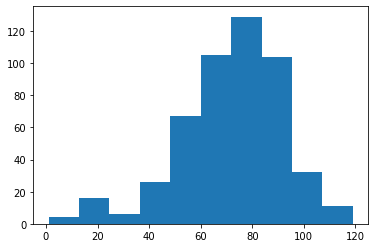

In [9]:
# Simulate random walk 500 times
all_walks = []
for i in range(500) :
    random_walk = [0]
    for x in range(100) :
        step = random_walk[-1]
        dice = np.random.randint(1,7)
        if dice <= 2:
            step = max(0, step - 1)
        elif dice <= 5:
            step = step + 1
        else:
            step = step + np.random.randint(1,7)
        if np.random.rand() <= 0.001 :
            step = 0
        random_walk.append(step)
    all_walks.append(random_walk)

# Create and plot np_aw_t
np_aw_t = np.transpose(np.array(all_walks))

# Select last row from np_aw_t: ends
ends = np_aw_t[-1, :]

# Plot histogram of ends, display plot
plt.hist(ends)
plt.show()

The histogram of the previous exercise was created from a Numpy array ends, that contains 500 integers. Each integer represents the end point of a random walk. To calculate the chance that this end point is greater than or equal to 60, you can count the number of integers in ends that are greater than or equal to 60 and divide that number by 500, the total number of simulations.

In [10]:
the_list = []

for element in ends:
    if element >= 60:
        the_list.append(element)

chance = (len(the_list) / 500) * 100
print(str(chance) + '%')

76.2%
